In [3]:
%pip install spacy spacy-transformers
%pip install fuzzywuzzy
%pip install python-Levenshtein
%pip install transformers
%pip install gensim
%pip install nltk
%pip install sklearn scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:

!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_trf



2023-09-07 07:47:32.972005: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 4.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
2023-09-07 07:47:55.476843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.3/460.3 MB 5.0 MB/s eta 0:00:0000:0100:

In [8]:
import spacy
import pandas as pd
from tqdm import tqdm
import numpy as np
import os
from fuzzywuzzy import fuzz
from collections import defaultdict
import re

2023-09-07 08:04:02.501654: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Functions

In [157]:
def preprocess_string(string : str) -> str:
    string = string.lower().strip()
    string = re.sub(' +', ' ', string)
    string = string.replace("_", " ")
    string = string.replace("-", " ")
    string = string.replace("&", " ")
    string = string.split("(")[0]
    string = string.split("#")[0]

    string = string.strip()

    # handle known synoynms
    synonyms = {
        "refrigerator": "fridge",
        "vaccumcleaner": "vacuum cleaner",
        "breadmaker": "bread maker",
      
        
    }
    if string in synonyms:
        string = synonyms[string]

    if 'hi fi' in string:
        string = "audio system"

    if "router" in string:
        string = "router"

    if "treadmill" in string:
        string = "running machine"
        

    if "laptop" in string:
        string = "laptop"
    
    if "server" in string:
        string = "server"

    if "monitor" in string and not "baby" in string:
        string = "monitor"
    # special cases
    if "computer" in string and "charger" not in string:
        string = "pc"

    if "tv" in string:
        string = "television"

    if "television" in string:
        string = "television"

    if "macbook" in string:
        string = "laptop"
        
    if "car charger" == string:
        string = "ev"
    
    if "toast" in string:
        string = "toaster"
    
    if "modem" in string:
        string = "router"

    # we treat all audio devices as speakers so subwoofer is also a speaker
    if "subwoofer" in string:
        string = "speaker"

    if "speaker" in string:
        string = "speaker"

    if "iron" in string and "soldering" not in string:
        string = "iron"

    
    if "coffeemachine" in string:
        string = "coffee machine"
    if "coffee maker" in string:
        string = "coffee machine"

    if "dishwasher" in string:
        string = "dish washer"
    if "air conditioner" in string:
        string = "ac"

    if "air conditioning" in string:
        string = "ac"
    
    string = re.sub(' +', ' ', string)
    string = re.sub(r'\d+', '', string)
    return string.strip()

### Get device list

In [163]:
device_list = []
ignore_list = [
    'CE appliance'
    ' kettle/toaster',
    ' dehumidifier/heater',
    'HairDryer-Straightener',
    'Office Desk',
    'heat basement',
    'set top box',
    'subpanel',




]
path = "./Energy_graph/data/training_data/"
for file in tqdm(os.listdir(path)):
    if not file.endswith(".pkl"):
        continue
   
    print(file)
    data = pd.read_pickle(path + file)
    for house in data:
        
        for device in data[house]:
            device_org = device
            device = device.lower()
            if device == "aggregate" or "outlet" in device or "sockets" in device or "lamp" in device or "light" in device or "plug" in device or "appliance" in device:
                # print("2 IGNORED: ", house, device)
                continue
  
            if house == "REFIT_21":
                if "kettle" in device or "toaster" in device:
                    print("1 IGNORED: ", house, device)
                    continue
            skip = False
            for d in ignore_list:
                if d.strip().lower() in device_org.strip().lower():
                    skip = True
                    break
            if skip:
                print("2 IGNORED: ", house, device)
                continue
            device = preprocess_string(device)
            test = device
            if "lamp" in device:
                print("HERE: ",house, device , test)
            if device not in device_list:
                device_list.append((device_org, device))


device_list = list(set(device_list))

# # save to pickle 
# import pickle
# with open('./Energy_graph/device_list.pkl', 'wb') as f:
#     pickle.dump(device_list, f)
    

  8%|▊         | 1/13 [00:00<00:01,  6.57it/s]

REDD.pkl
2 IGNORED:  REDD_5 subpanel
ECO.pkl


 15%|█▌        | 2/13 [00:04<00:25,  2.34s/it]

REFIT.pkl


 23%|██▎       | 3/13 [00:07<00:28,  2.86s/it]

1 IGNORED:  REFIT_21  kettle/toaster
2 IGNORED:  REFIT_16  dehumidifier/heater
UK-DALE.pkl


 31%|███       | 4/13 [00:10<00:27,  3.07s/it]

2 IGNORED:  UKDALE_5 set top box
SUST2.pkl


 38%|███▊      | 5/13 [00:11<00:16,  2.12s/it]

2 IGNORED:  SUST2_1 hairdryer-straightener
ENERTALK.pkl


 54%|█████▍    | 7/13 [00:14<00:11,  1.86s/it]

HES_clean.pkl


 62%|██████▏   | 8/13 [00:14<00:07,  1.44s/it]

DEDDIAG.pkl


 69%|██████▉   | 9/13 [00:16<00:05,  1.37s/it]

2 IGNORED:  DEDDIAG_8 office desk
HEART.pkl


 77%|███████▋  | 10/13 [00:16<00:03,  1.15s/it]

IAWE.pkl
DRED.pkl


100%|██████████| 13/13 [00:17<00:00,  1.31s/it]


In [165]:
device_list.sort()
device_list

[(' blender', 'blender'),
 (' bread-maker', 'bread maker'),
 (' chest freezer', 'chest freezer'),
 (' chest freezer (in garage)', 'chest freezer'),
 (' combination microwave', 'combination microwave'),
 (' computer', 'pc'),
 (' computer site', 'pc'),
 (' desktop computer', 'pc'),
 (' dishwasher', 'dish washer'),
 (' dryer', 'dryer'),
 (' electric heater', 'electric heater'),
 (' electric heater (1)?', 'electric heater'),
 (' electric heater (2)', 'electric heater'),
 (' food mixer', 'food mixer'),
 (' food processor', 'food processor'),
 (' freezer', 'freezer'),
 (' freezer (garage)', 'freezer'),
 (' freezer (utility room)', 'freezer'),
 (' freezer(garage)', 'freezer'),
 (' fridge', 'fridge'),
 (' fridge & freezer', 'fridge freezer'),
 (' fridge(garage)', 'fridge'),
 (' fridge-freezer', 'fridge freezer'),
 (' fridge-freezer (1)', 'fridge freezer'),
 (' fridge-freezer (2)', 'fridge freezer'),
 (' hi-fi', 'audio system'),
 (' kettle', 'kettle'),
 (' microwave', 'microwave'),
 (' mjy comp

In [117]:
device_list = pd.read_pickle('./Energy_graph/embeddings/device_list.pkl')


### Fuzzy wuzzy

In [81]:

labels = device_list
grouped_labels = {}
threshold = 86 # Set a threshold for similarity

for label in labels:
    found = False
    for key in grouped_labels:
        if fuzz.WRatio(label.lower(), key.lower()) > threshold:
            grouped_labels[key].append(label)
            found = True
            break
    if not found:
        grouped_labels[label] = [label]

# grouped_labels["fridge"].append("refrigerator")
# grouped_labels.pop("refrigerator")
grouped_labels, len(grouped_labels)

({'car charger': ['car charger', 'charger'],
  'bread maker': ['bread maker'],
  'blender': ['blender'],
  'hairdryer straightener': ['hairdryer straightener', 'dryer'],
  'vacuum cleaner': ['vacuum cleaner'],
  'rice cooker': ['rice cooker', 'cooker'],
  'water heater': ['water heater', 'heater'],
  'heat bedroom': ['heat bedroom'],
  'ce appliance': ['ce appliance', 'wet appliance'],
  'smoke alarm': ['smoke alarm'],
  'electric heater': ['electric heater', 'electric space heater'],
  'minioven': ['minioven', 'oven'],
  'air handling unit': ['air handling unit'],
  'washing machine': ['washing machine'],
  'chest freezer': ['chest freezer', 'freezer'],
  'heat living room': ['heat living room', 'heat dining room'],
  'waste disposal unit': ['waste disposal unit'],
  'water purifier': ['water purifier'],
  'air conditioning': ['air conditioning'],
  'motor': ['motor'],
  'laptop': ['laptop', 'laptops'],
  'games console': ['games console'],
  'bouncy castle pump': ['bouncy castle pump

In [34]:
str1 = "fridge"
str2 = "refrigerator"
fuzz.partial_ratio(str1, str2), fuzz.ratio(str1,str2), fuzz.token_sort_ratio(str1,str2), fuzz.token_set_ratio(str1,str2), fuzz.WRatio(str1,str2)

(83, 56, 56, 56, 75)

### Spacy using kmeans

In [31]:
import spacy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

N_CLUSTERS = 25

# Load the largge English model in spaCy (contains word vectors)
# nlp = spacy.load('en_core_web_trf')
nlp = spacy.load('en_core_web_lg')

# List of devices
devices = device_list

# Create vectors for each device name
device_vectors = np.array([nlp(device).vector for device in devices])

# Use KMeans clustering to group devices
kmeans = KMeans(n_clusters=N_CLUSTERS)  # Choose an appropriate number of clusters
kmeans.fit(device_vectors)
labels = kmeans.labels_

# Print out the devices grouped by their cluster
grouped_devices = {}
for label, device in zip(labels, devices):
    if label not in grouped_devices:
        grouped_devices[label] = []
    grouped_devices[label].append(device)

for label, devices in grouped_devices.items():
    print(f"Group {label}: {devices}")


Group 1: ['coffeemachine', 'htpc', 'handmixer', 'breadmaker', 'vivarium', 'television', 'fountain', 'minioven', 'vaccumcleaner', 'subpanel', 'watercooker']
Group 13: ['food mixer', 'food processor']
Group 2: ['electric oven', 'oven', 'stove oven', 'stove', 'boiler']
Group 7: ['games console', 'router', 'usb hub', 'printer', 'broadband router', 'network attached storage', 'projector']
Group 21: ['electric stove', 'electric heating element', 'electric heater ', 'electric heater', 'solar thermal pumping station', 'motor', 'electric space heater', 'electric furnace', 'heater']
Group 12: ['refrigerator', 'fridge freezer', 'kimchi fridge', 'freezer', 'fridge', 'chest freezer ', 'chest freezer', 'fridge freezer ', 'upright freezer', 'freezer ']
Group 23: ['stereo', 'audio system', 'audio amplifier', 'speaker']
Group 4: ['treadmill', 'bouncy castle pump', 'whirlpool bath', 'office desk', 'combination microwave', 'ce appliance', 'hairdryer straightener', 'external hard disk', 'smoke alarm']
Gro

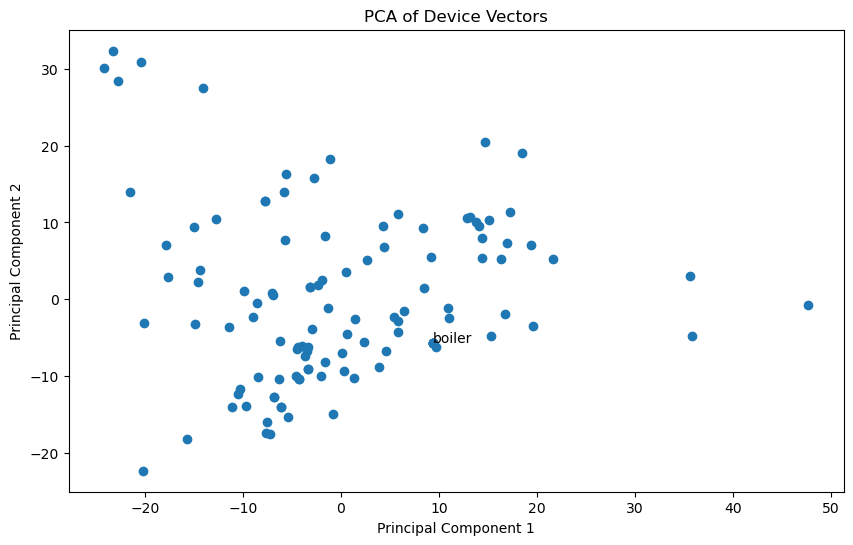

In [30]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_device_vectors = pca.fit_transform(device_vectors)

# Plot the reduced device vectors
plt.figure(figsize=(10, 6))
plt.scatter(reduced_device_vectors[:, 0], reduced_device_vectors[:, 1])

# Annotate the points
for i, device in enumerate(devices):
    plt.annotate(device, (reduced_device_vectors[i, 0], reduced_device_vectors[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Device Vectors')
plt.show()

KMeans with 25 Clusters
Group 5: ['coffeemachine', 'htpc', 'handmixer', 'breadmaker', 'vivarium', 'fountain', 'minioven', 'vaccumcleaner', 'subpanel', 'watercooker']
Group 17: ['food mixer', 'food processor']
Group 15: ['electric oven', 'oven', 'stove oven', 'oven extractor fan', 'stove']
Group 2: ['games console', 'router', 'combination microwave', 'charger', 'usb hub', 'printer', 'broadband router', 'waste disposal unit', 'external hard disk', 'monitor', 'network attached storage', 'projector']
Group 6: ['electric stove', 'electric heating element', 'electric heater ', 'electric heater', 'solar thermal pumping station', 'electric space heater', 'electric furnace', 'heater', 'dehumidifier/heater', 'boiler']
Group 3: ['refrigerator', 'fridge freezer', 'kimchi fridge', 'freezer', 'microwave', 'fridge', 'chest freezer ', 'chest freezer', 'fridge freezer ', 'upright freezer', 'freezer ']
Group 22: ['stereo', 'audio system', 'audio amplifier', 'speaker']
Group 11: ['treadmill', 'bouncy cas

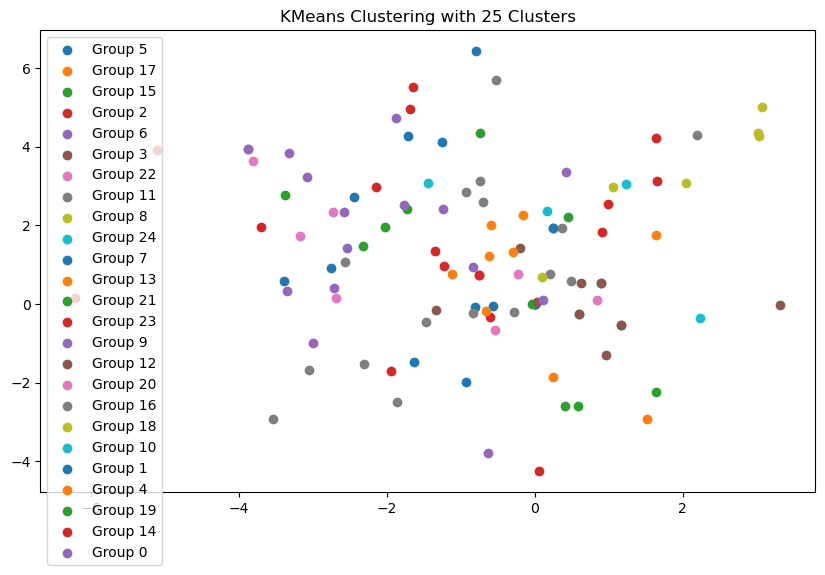

KMeans with 30 Clusters
Group 1: ['tumble dryer 3']


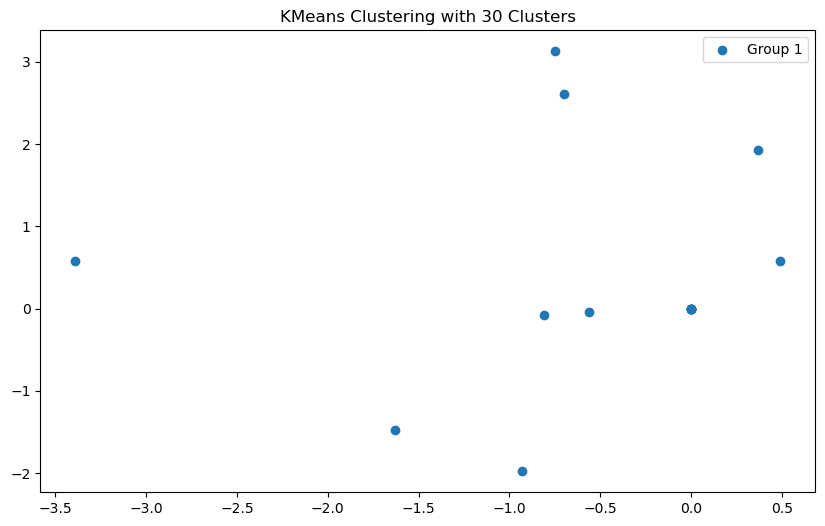

KMeans with 35 Clusters
Group 14: ['tumble dryer 3']


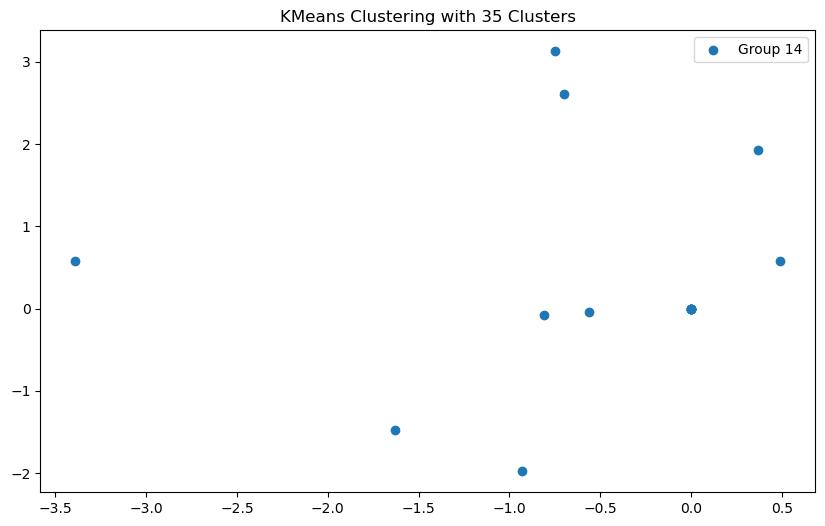

KMeans with 40 Clusters
Group 6: ['tumble dryer 3']


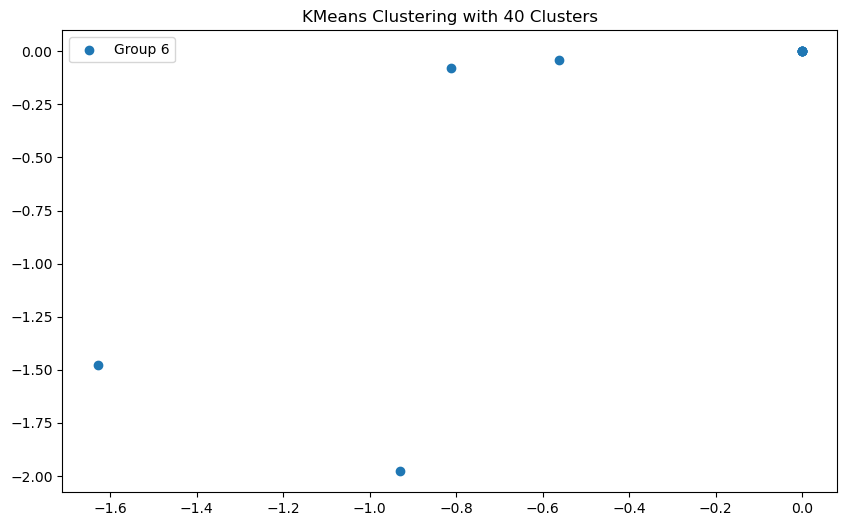

KMeans with 45 Clusters
Group 12: ['tumble dryer 3']


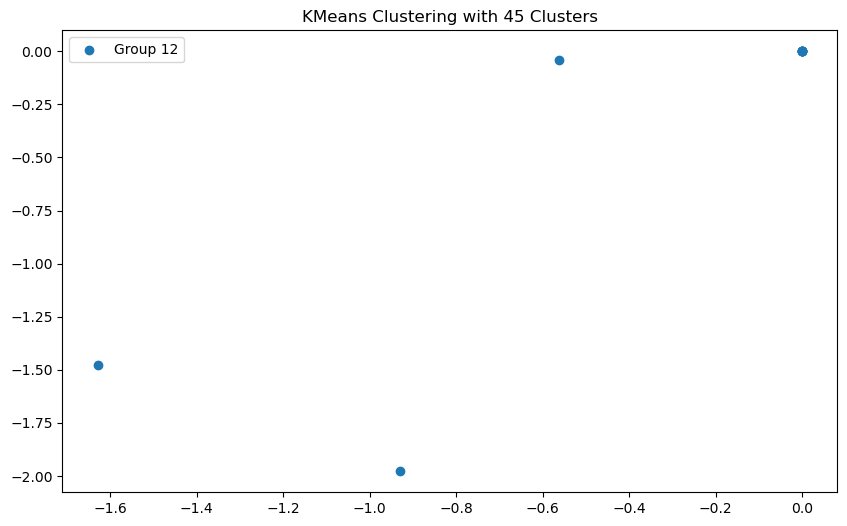

KMeans with 50 Clusters
Group 0: ['tumble dryer 3']


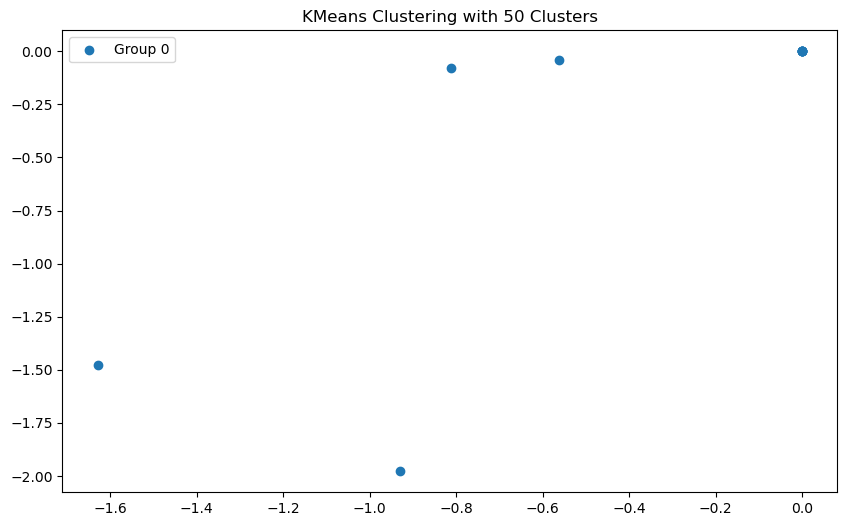

KMeans with 55 Clusters
Group 15: ['tumble dryer 3']


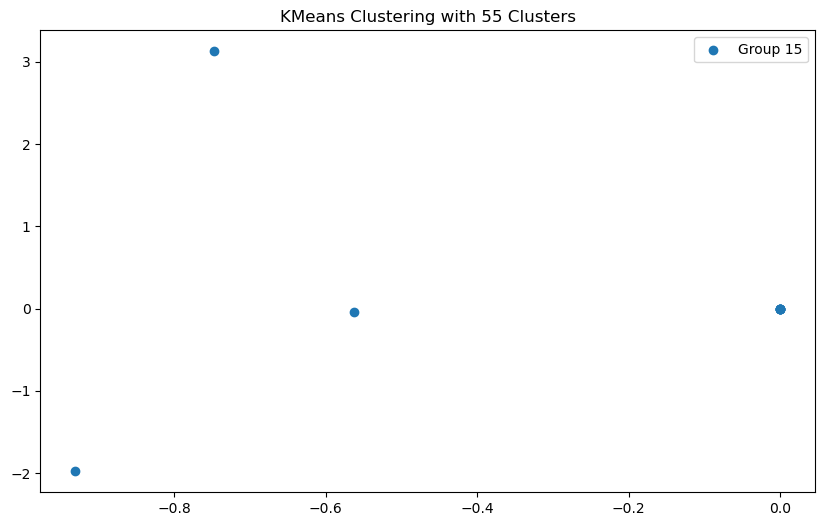

KMeans with 60 Clusters
Group 7: ['tumble dryer 3']


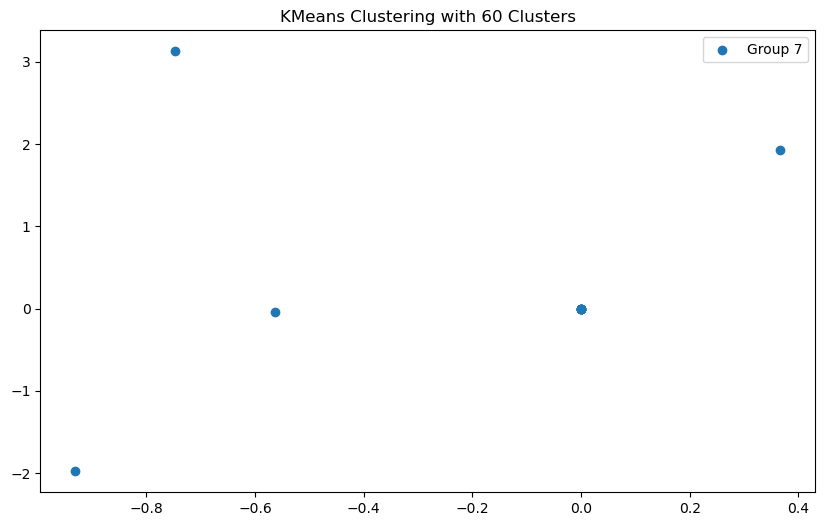

KMeans with 65 Clusters
Group 2: ['tumble dryer 3']


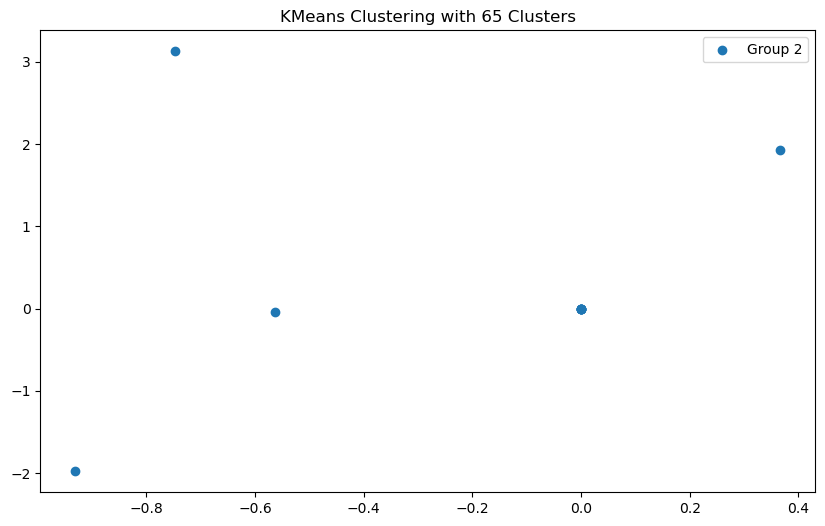

KMeans with 70 Clusters
Group 4: ['tumble dryer 3']


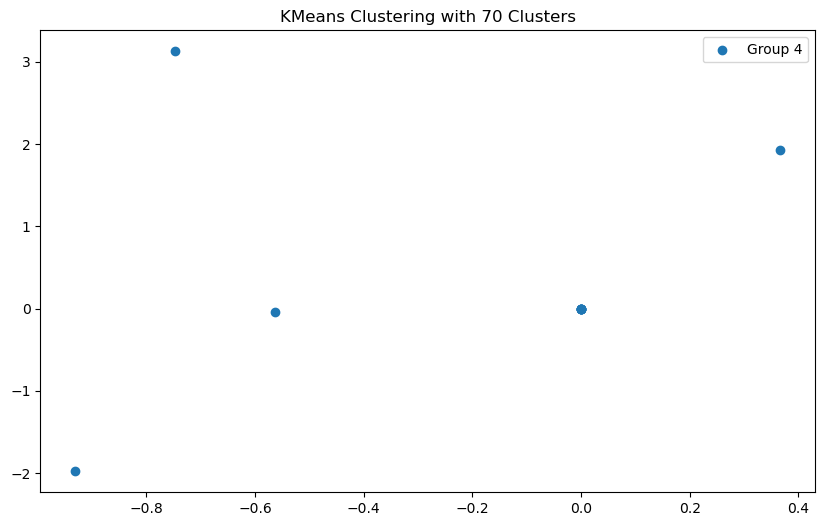

KMeans with 75 Clusters
Group 4: ['tumble dryer 3']


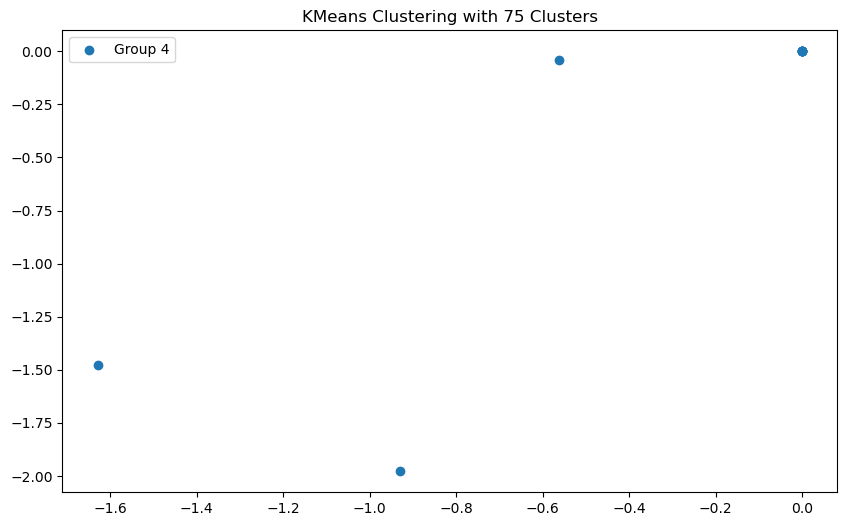

In [26]:
import spacy
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the large English model in spaCy (contains word vectors)
# nlp = spacy.load('en_core_web_trf')
nlp = spacy.load('en_core_web_lg')

# List of devices
devices = device_list  # Assuming device_list is already defined

# Create vectors for each device name
device_vectors = np.array([nlp(device).vector for device in devices])

# Loop through different numbers of clusters
for n_clusters in range(25, 76, 5):
    # Initialize and fit KMeans algorithm
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(device_vectors)
    labels = kmeans.labels_
    
    # Group the devices based on their cluster label
    grouped_devices = {}
    for label, device in zip(labels, devices):
        if label not in grouped_devices:
            grouped_devices[label] = []
        grouped_devices[label].append(device)
    
    # Print and plot the device groups
    print(f"KMeans with {n_clusters} Clusters")
    plt.figure(figsize=(10, 6))
    
    for label, devices in grouped_devices.items():
        print(f"Group {label}: {devices}")
        
        # Assuming device_vectors is 2D. If not, you might want to reduce dimensionality before plotting
        plt.scatter(device_vectors[labels == label, 0], device_vectors[labels == label, 1], label=f'Group {label}')
        
    plt.legend()
    plt.title(f"KMeans Clustering with {n_clusters} Clusters")
    plt.show()


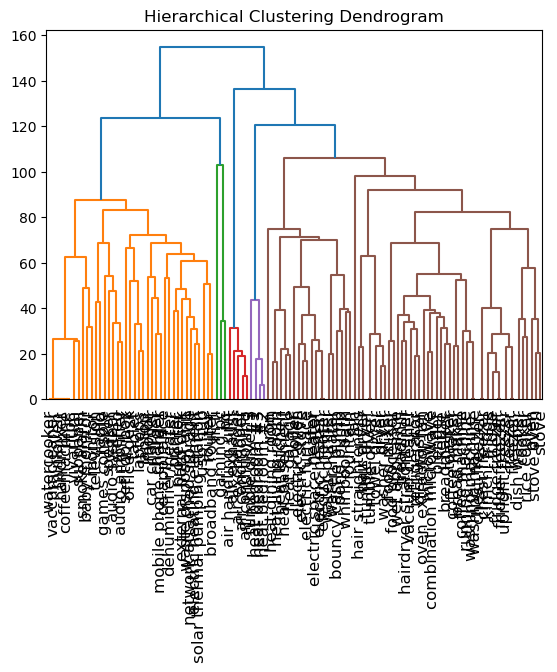

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np

# Given that 'device_vectors' is a 2D numpy array where each row is a vector for a corresponding device
device_vectors = np.array(device_vectors)  

# Generate the linkage matrix
Z = linkage(device_vectors, 'ward')

# Create a dendrogram
dendrogram(
    Z,
    labels=device_list,
    leaf_rotation=90.,
    leaf_font_size=12.,
)

plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [25]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram to create clusters (e.g., cut at height 20)
max_height = 50
clusters = fcluster(Z, max_height, criterion='distance')

# Create dictionary to store clusters
cluster_dict = {}
for i, cluster_id in enumerate(clusters):
    if cluster_id not in cluster_dict:
        cluster_dict[cluster_id] = []
    cluster_dict[cluster_id].append(device_list[i])

# Print clusters
for cluster_id, devices in cluster_dict.items():
    print(f"Group {cluster_id}: {devices}")


Group 1: ['coffeemachine', 'htpc', 'handmixer', 'vivarium', 'minioven', 'vaccumcleaner', 'subpanel', 'watercooker']
Group 27: ['food mixer', 'food processor']
Group 21: ['electric oven', 'electric stove', 'electric heater ', 'electric heater', 'electric space heater', 'electric furnace', 'heater', 'boiler']
Group 5: ['games console']
Group 28: ['refrigerator', 'treadmill', 'microwave', 'combination microwave', 'dishwasher', 'blender', 'breadmaker', 'hairdryer straightener', 'oven extractor fan', 'vacuum cleaner', 'toaster', 'kettle', 'wet appliance']
Group 4: ['stereo', 'audio system', 'audio amplifier', 'speaker']
Group 18: ['air conditioner', 'air conditioning', 'air exhaust', 'air exchanger', 'air handling unit']
Group 23: ['bouncy castle pump', 'whirlpool bath', 'pond pump', 'fountain']
Group 13: ['electric heating element', 'solar thermal pumping station', 'printer', 'waste disposal unit', 'external hard disk', 'network attached storage', 'projector']
Group 25: ['hair straightener

### Spacy using kmeans using transformer

In [58]:
import spacy
from sklearn.cluster import KMeans
import numpy as np

# Initialize spaCy model with transformer
nlp = spacy.load("en_core_web_trf")

# Add the transformer component to the pipeline
if "transformer" not in nlp.pipe_names:
    transformer = nlp.add_pipe("transformer", name="transformer", last=True)

# Get vectors from transformer output
def get_vector_from_transformer_output(doc):
    tensor = doc._.trf_data.tensors[-1]
    return tensor.mean(axis=1).squeeze()

# Your list of devices
# device_list = ["laptop", "mobile", "tablet", "desktop"]

# Generate vectors
device_vectors = np.array([get_vector_from_transformer_output(nlp(device)) for device in device_list])


# KMeans clustering
# N_CLUSTERS = 2  # or however many clusters you'd like
kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(device_vectors.reshape(-1, 1))
labels = kmeans.labels_

# Group by labels
grouped_devices = {i: [] for i in set(labels)}
for label, device in zip(labels, device_list):
    grouped_devices[label].append(device)

# Display the groups
for label, devices in grouped_devices.items():
    print(f"Group {label}: {devices}")


Group 0: ['motor', 'air handling unit', 'smoke alarm', 'fridge freezer', 'blender', 'projector', 'car charger', 'air conditioning', 'set top box', 'fridge freezer ', 'bread maker']
Group 1: ['broadband router', 'dehumidifier/heater', 'gaming pc']
Group 2: ['solar thermal pumping station', 'tumble dryer ', 'tumble dryer']
Group 3: ['minioven', 'vivarium', 'heat kitchen']
Group 4: ['tablet', 'stereo', 'dish washer', 'handmixer']
Group 5: ['upright freezer', 'freezer', 'baby monitor', 'pc', 'electric furnace', 'freezer ', 'stove']
Group 6: ['fridge', 'waste disposal unit', 'charger', 'speaker', 'running machine', 'heat dining room', 'combination microwave', 'coffee machine', 'electric space heater', 'vacuum cleaner', 'pond pump', 'radio']
Group 7: ['wet appliance', 'microwave', 'audio amplifier', 'air conditioner', 'oven extractor fan', 'food mixer', 'watercooker']
Group 8: ['chest freezer ', 'washing machine', 'breadmaker', 'kimchi fridge', 'washing machine ', 'printer', 'coffeemachine',

### Genism k-means using google news word2vec

In [13]:
from nltk.stem import PorterStemmer
from gensim.models import KeyedVectors

# Initialize stemmer
ps = PorterStemmer()

# Load Word2Vec model
model_path = "./Energy_graph/google_word2vec/GoogleNews-vectors-negative300.bin"  # Replace with the path to your model
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

# Your list of words
words = device_list  # Replace with your list

# Stem words and find vectors
for word in words:
    stemmed_word = ps.stem(word)
    try:
        vector = model[stemmed_word]
        print(f"Vector for {word} (stemmed to {stemmed_word})")
    except KeyError:
        print(f"{word} (stemmed to {stemmed_word}) not in vocabulary.")


coffeemachine (stemmed to coffeemachin) not in vocabulary.
food mixer (stemmed to food mix) not in vocabulary.
electric oven (stemmed to electric oven) not in vocabulary.
games console (stemmed to games consol) not in vocabulary.
electric stove (stemmed to electric stov) not in vocabulary.
refrigerator (stemmed to refriger) not in vocabulary.
Vector for stereo (stemmed to stereo)
treadmill (stemmed to treadmil) not in vocabulary.
air conditioner (stemmed to air condition) not in vocabulary.
bouncy castle pump (stemmed to bouncy castle pump) not in vocabulary.
electric heating element (stemmed to electric heating el) not in vocabulary.
food processor (stemmed to food processor) not in vocabulary.
hair straighteners (stemmed to hair straighten) not in vocabulary.
Vector for oven (stemmed to oven)
water purifier (stemmed to water purifi) not in vocabulary.
audio system (stemmed to audio system) not in vocabulary.
tumble dryer (stemmed to tumble dry) not in vocabulary.
heat kitchen (stemme

In [9]:
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
import numpy as np

N_CLUSTERS = 25
# Load pre-trained Word2Vec model
# Replace 'path/to/GoogleNews-vectors-negative300.bin' with the actual path to the pre-trained model
model = KeyedVectors.load_word2vec_format('./Energy_graph/google_word2vec/GoogleNews-vectors-negative300.bin', binary=True)

# List of words to cluster
words = device_list

# Create an array of word vectors
word_vectors = np.array([model[word] for word in words if word in model])

# Check for words not in the model
not_in_model = [word for word in words if word not in model]
if not_in_model:
    print(f"Note: The following words are not in the model: {not_in_model}")

# Perform KMeans clustering
 # You can choose a different number of clusters
kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(word_vectors)
labels = kmeans.labels_

# Print out the words grouped by their cluster
grouped_words = {}
for label, word in zip(labels, words):
    if label not in grouped_words:
        grouped_words[label] = []
    grouped_words[label].append(word)

for label, grouped_word in grouped_words.items():
    print(f"Group {label}: {grouped_word}")


Note: The following words are not in the model: ['coffeemachine', 'food mixer', 'electric oven', 'games console', 'electric stove', 'air conditioner', 'bouncy castle pump', 'electric heating element', 'food processor', 'hair straighteners', 'water purifier', 'audio system', 'tumble dryer', 'heat kitchen', 'heat bedroom #3', 'electric heater ', 'fridge freezer', 'kimchi fridge', 'heat basement', 'washing machine ', 'heat garage', 'whirlpool bath', 'office desk', 'combination microwave', 'electric heater', 'hi fi', 'solar thermal pumping station', 'htpc', 'air conditioning', 'usb hub', 'ce appliance', 'audio amplifier', 'air exhaust', 'handmixer', 'coffee maker', 'mobile phone charger', 'heat bedroom #2', 'tumble dryer ', 'set top box', 'stove oven', 'coffee machine', 'dish washer', 'air exchanger', 'baby monitor', 'running machine', 'hairdryer straightener', 'gaming pc', 'broadband router', 'chest freezer ', 'heat dining room', 'oven extractor fan', 'hair dryer', 'washing machine', 'pon